<a href="https://colab.research.google.com/github/NaufalSyahandra/PCVK_GANJIL_2024/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktium 3**

## Akses Drive

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## Linear Brightness Transformation

Change image Brightness ratio
-----------------------------
Input Brightness value: 50


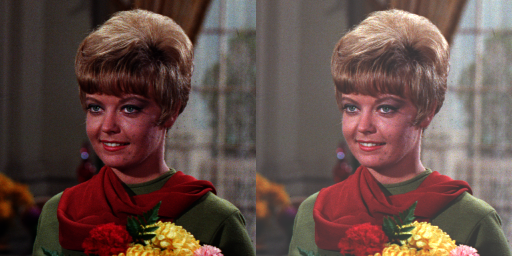

In [3]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Change image Brightness ratio')
print('-----------------------------')
try:
  brightness = int(input('Input Brightness value: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# access image each-pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y, x, c] = np.clip(original[y,x,c] + brightness, 0, 255)

# solution without looping
# brightness = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

## **Task**

### 1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:


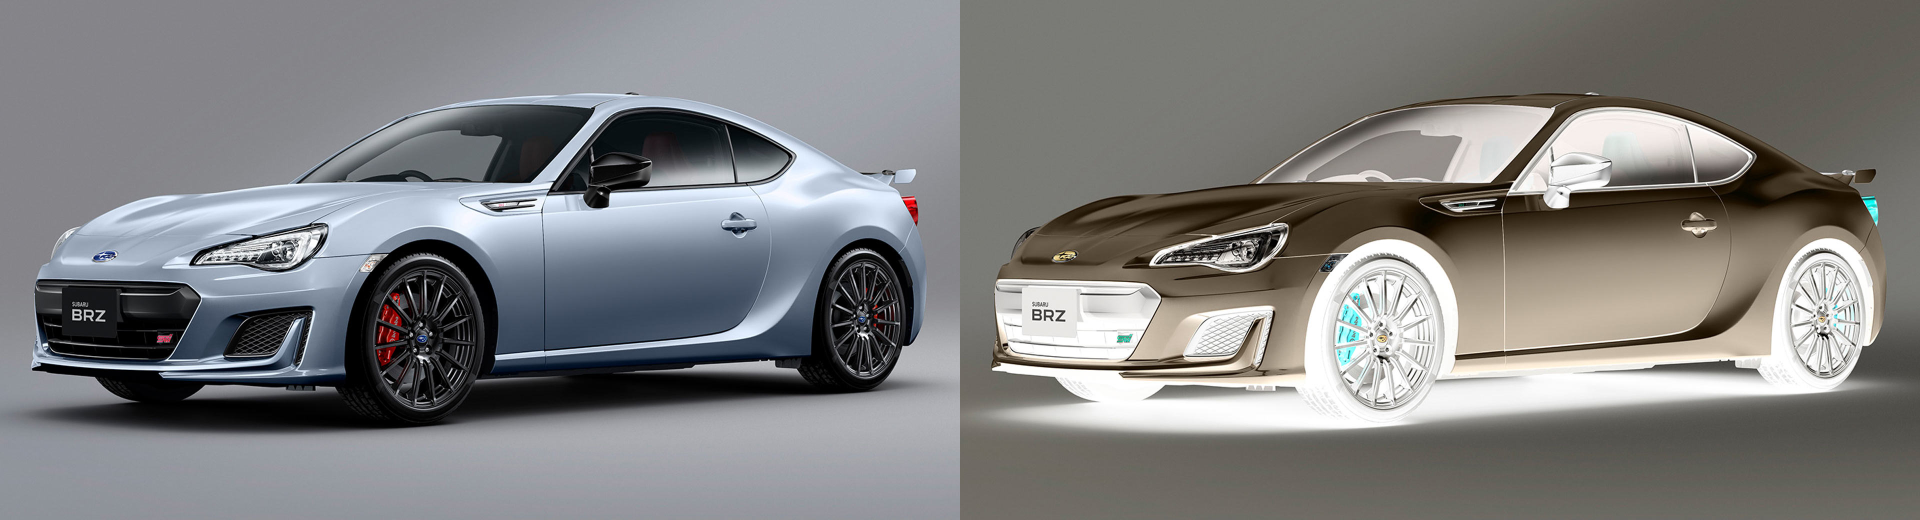

In [12]:
subaru = cv.imread('/content/drive/MyDrive/PCVK/subaru.jpg')
subaru = cv.resize(subaru, (0,0), fx=0.5, fy=0.5)
inverse_subaru = subaru.copy()
for y in range(inverse_subaru.shape[0]):
  for x in range(inverse_subaru.shape[1]):
    for c in range(inverse_subaru.shape[2]):
      inverse_subaru[y,x,c] = 255 - inverse_subaru[y,x,c]

final_frame = cv.hconcat((subaru, inverse_subaru))
cv2_imshow(final_frame)

#### If Using vectorized operations (built-in to OpenCV)

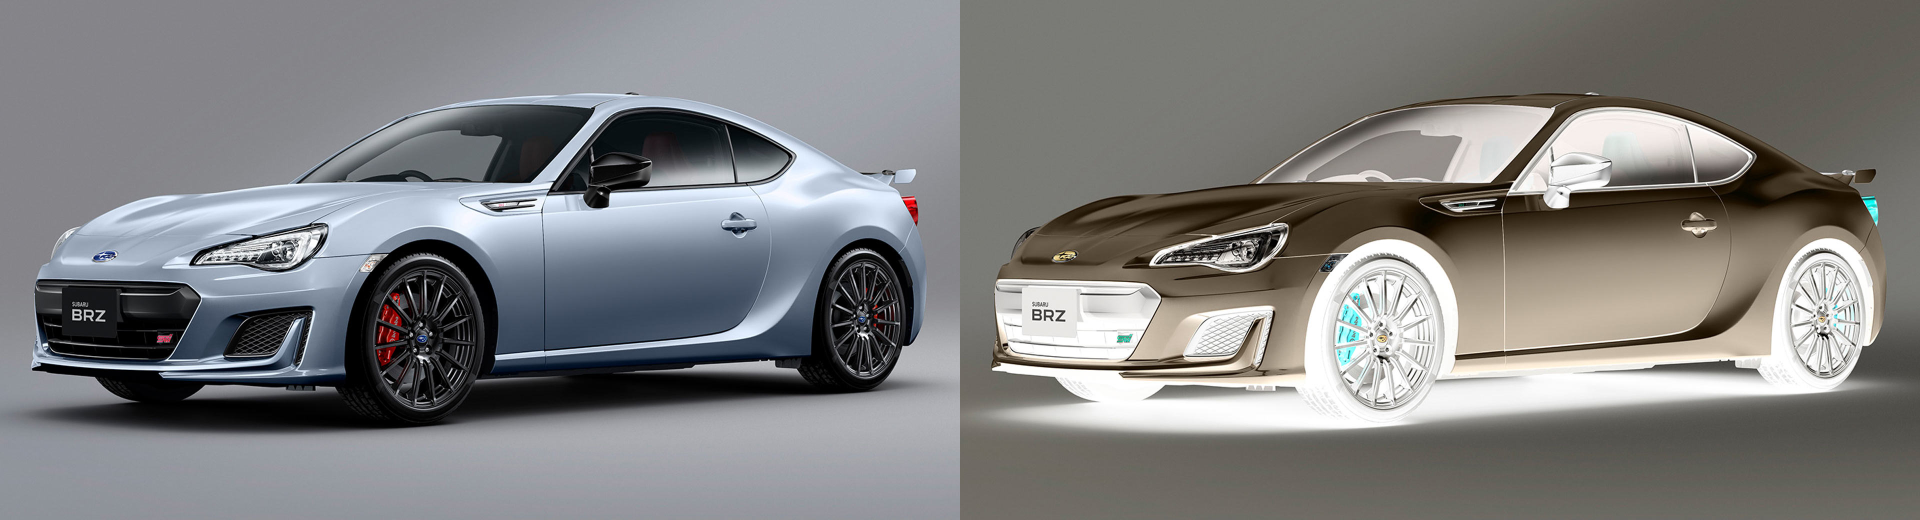

In [13]:
subaru = cv.imread('/content/drive/MyDrive/PCVK/subaru.jpg')
subaru = cv.resize(subaru, (0,0), fx=0.5, fy=0.5)
inverse_subaru = cv.bitwise_not(subaru)

final_frame = cv.hconcat((subaru, inverse_subaru))
cv2_imshow(final_frame)

### 2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga menghasilkan keluaran seperti berikut:


Change image Brightness ratio and contras
-----------------------------
Input Brightness value [-255 - 255]: 50
Input Contrast value [1.0 - 3.0]: 2


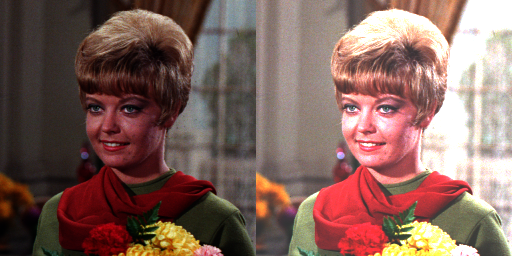

In [15]:
print('Change image Brightness ratio and contras')
print('-----------------------------')

brightness = int(input('Input Brightness value [-255 - 255]: '))
contrast = float(input('Input Contrast value [1.0 - 3.0]: '))

contrast_transformation = np.zeros(original.shape, original.dtype)

# access image each-pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_transformation[y, x, c] = np.clip(contrast *  original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_transformation))
cv2_imshow(final_frame)

#### if using convertScaleAbs

Change image Brightness ratio and contrast
-----------------------------
Input Brightness value [-255 - 255]: 50
Input Contrast value [1.0 - 3.0]: 2


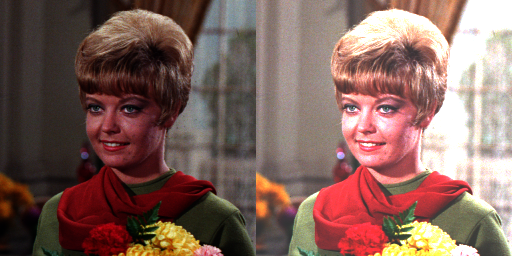

In [16]:
print('Change image Brightness ratio and contrast')
print('-----------------------------')

brightness = int(input('Input Brightness value [-255 - 255]: '))
contrast = float(input('Input Contrast value [1.0 - 3.0]: '))

contrast_transformation = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

final_frame = cv.hconcat((original, contrast_transformation))
cv2_imshow(final_frame)

### 3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log, sehingga menghasilkan keluaran seperti berikut:

Change image Brightness ratio with Log Transformation
-----------------------------
Input Brightness value: 50


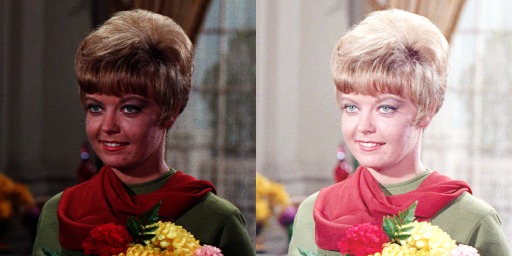

In [17]:
print('Change image Brightness ratio with Log Transformation')
print('-----------------------------')

brightness = int(input('Input Brightness value: '))

log_transformation = np.zeros(original.shape, original.dtype)

# access image each-pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      log_transformation[y, x, c] = np.clip(brightness *  np.log(1 + original[y, x, c]), 0, 255)

final_frame = cv.hconcat((original, log_transformation))
cv2_imshow(final_frame)

#### if using np.log1p

Change image Brightness ratio with Log Transformation
-----------------------------
Input Brightness value: 50


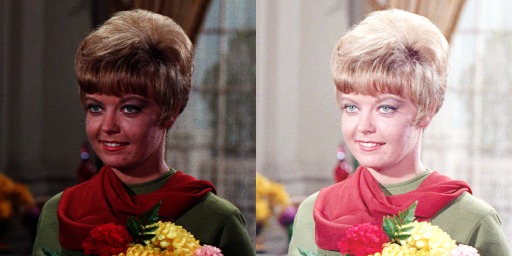

In [18]:
print('Change image Brightness ratio with Log Transformation')
print('-----------------------------')

brightness = int(input('Input Brightness value: '))

original_float = np.float32(original)

log_transformation = brightness * np.log1p(original_float)  # np.log1p(x) = log(1 + x)

log_transformation = np.clip(log_transformation, 0, 255).astype(np.uint8)

final_frame = cv.hconcat((original, log_transformation))
cv2_imshow(final_frame)

### 4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

#### **Gray Scale Average**

In [19]:
gray_avg_subaru = subaru.copy()

# access image each-pixel
for y in range(gray_avg_subaru.shape[0]):
  for x in range(gray_avg_subaru.shape[1]):
    red = gray_avg_subaru[y,x,2]
    green = gray_avg_subaru[y,x,1]
    blue = gray_avg_subaru[y,x,0]
    gray_avg_subaru[y,x] = np.mean([red, green, blue])

# show image
final_frame = cv.hconcat((subaru, gray_avg_subaru))
cv2_imshow(final_frame)

#### **Cray Scale Lightness**

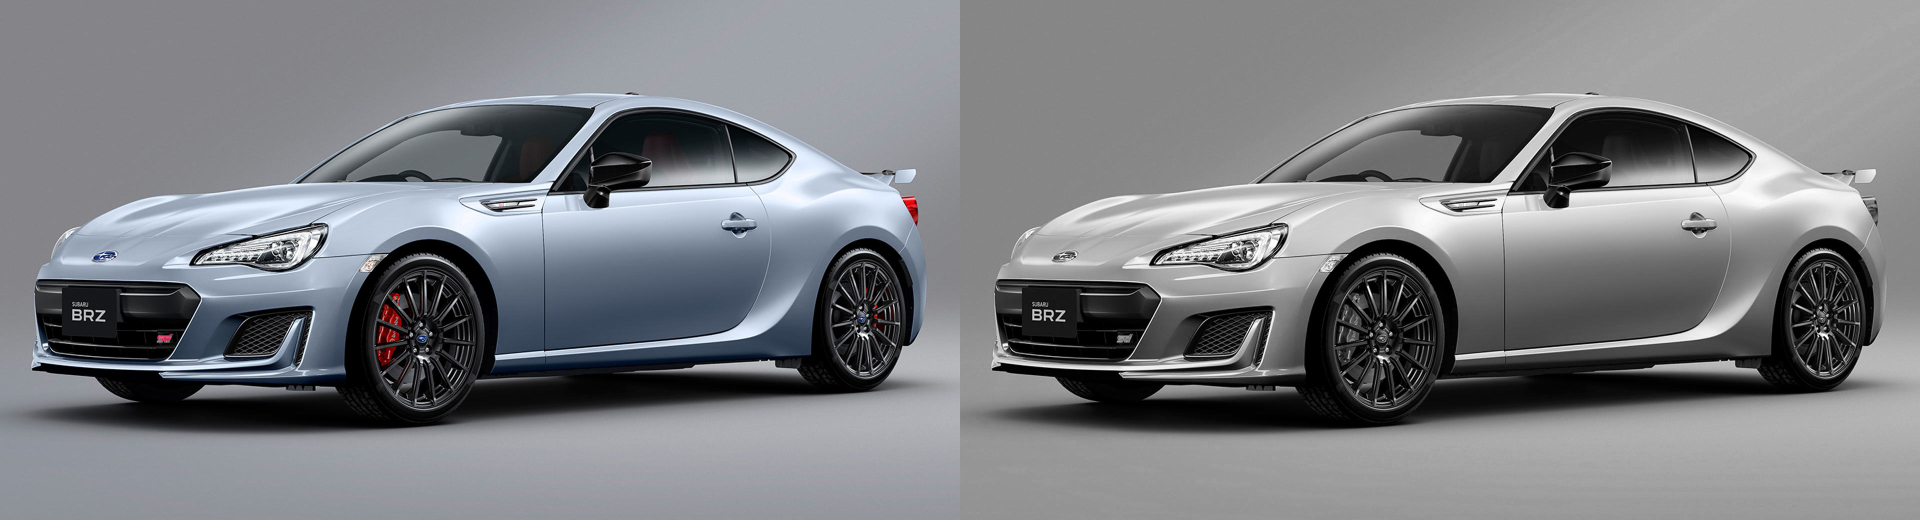

In [20]:
gray_lightness_subaru = subaru.copy()

# access image each-pixel
for y in range(gray_lightness_subaru.shape[0]):
  for x in range(gray_lightness_subaru.shape[1]):
    r_subaru = gray_lightness_subaru[y,x,2]
    g_subaru = gray_lightness_subaru[y,x,1]
    b_subaru = gray_lightness_subaru[y,x,0]

    max_subaru = np.float32(np.max([r_subaru, g_subaru, b_subaru]))
    min_subaru = np.float32(np.min([r_subaru, g_subaru, b_subaru]))
    gray_lightness_subaru[y,x] = np.uint8((max_subaru + min_subaru) / 2)

final_frame = cv.hconcat((subaru, gray_lightness_subaru))
cv2_imshow(final_frame)

#### **Gray Scale Luminance**

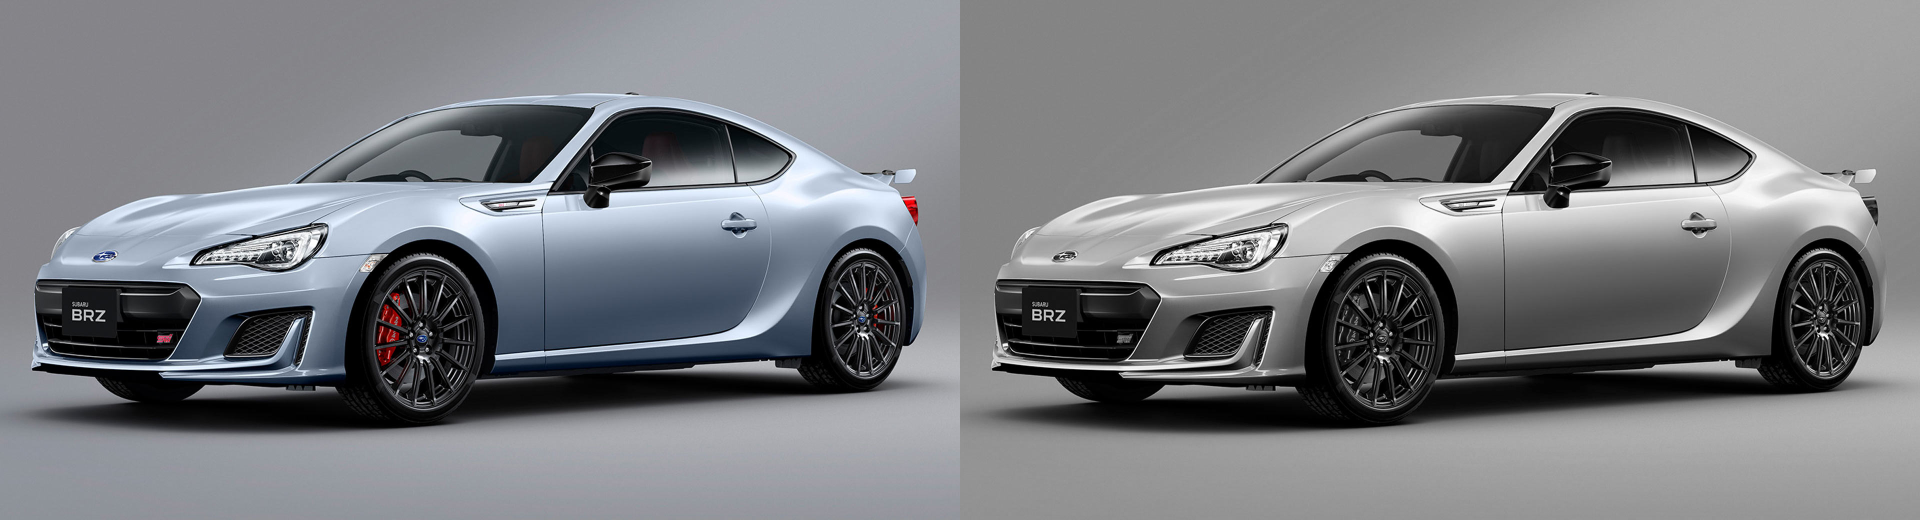

In [22]:
gray_luminance_subaru = subaru.copy()

# access image each-pixel
for y in range(gray_luminance_subaru.shape[0]):
  for x in range(gray_luminance_subaru.shape[1]):
    red = gray_luminance_subaru[y,x,2]
    green = gray_luminance_subaru[y,x,1]
    blue = gray_luminance_subaru[y,x,0]
    gray_luminance_subaru[y,x] = (0.21 * red) + (0.72 * green) + (0.07 * blue)

final_frame = cv.hconcat((subaru, gray_luminance_subaru))
cv2_imshow(final_frame)

### 5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut:

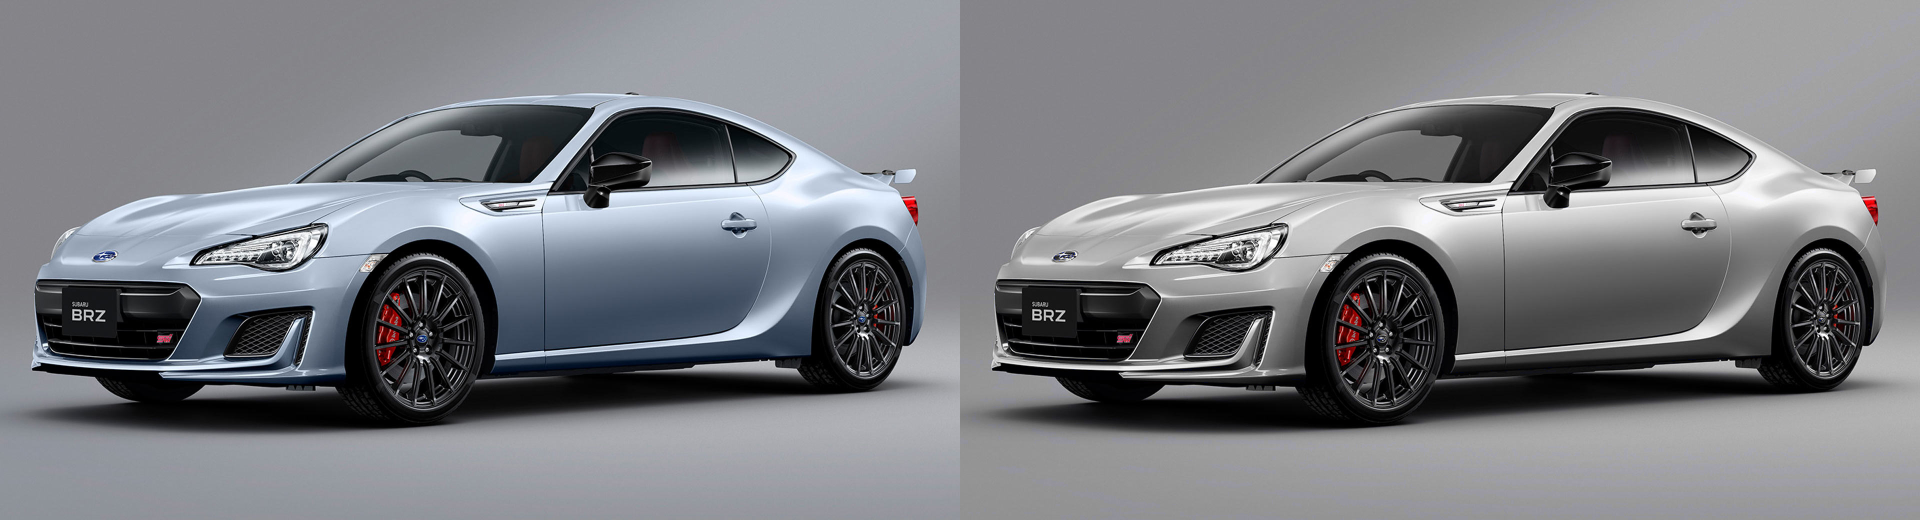

In [23]:
# Convert to HSV
hsv_image = cv.cvtColor(subaru, cv.COLOR_BGR2HSV)

lower_bound = np.array([80, 0, 0])
upper_bound = np.array([115, 255, 255])

mask = cv.inRange(hsv_image, lower_bound, upper_bound)
mask_inv = cv.bitwise_not(mask)

gray_subaru = cv.cvtColor(subaru, cv.COLOR_BGR2GRAY)
gray_subaru_3ch = cv.cvtColor(gray_subaru, cv.COLOR_GRAY2BGR)

color_region = cv.bitwise_and(subaru, subaru, mask=mask_inv)
gray_background = cv.bitwise_and(gray_subaru_3ch, gray_subaru_3ch, mask=mask)

final_image = cv.add(color_region, gray_background)

cv2_imshow(cv.hconcat((subaru, final_image)))